
<center>
<div class="alert alert-block alert-info">
<h1><b>Fundamental & Hands-on Introduction to Machine Learning</b></h1></div>

Dr. Sothea HAS <br>
CNRS, LPSM - Université Paris Cité, LMD - École polytechnique<br>

Date: 19/07/2023 <br>
</center>

---

This `jupyter notebook` aims at guiding you through what you have seen during the talk. We begin the first section with `Linear Regression` models, then move to classification problems where you can start to build `Perceptron` model and `Multi-layer Perceptron` or `DNN` models. For more information, read for example, [scikit learn](https://scikit-learn.org/stable/) and [keras](https://keras.io/).

**Task**

1. Linear regression: Simple & Multiple
    - Dataset: `Tips`
    - Simple linear regression
    - Multiple linear regression
2. Logistic regression: Simple & Multinomial
    - Dataset: `Spam` & `Mnist`
    - Perceptron or Binary logistic regression with `Spam` dataset
    - Multi-layer perceptron or Multinomial logistic regression with `Mnist` dataset
3. Deep Neural Networks
    - Dataset: `Spam` & `Mnist`
    - It's your turn!

## 0. Importing datasets and useful libraries

In [1]:
# Basic modules
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

# Tensorflow for DNN
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model


<div class="alert alert-block alert-warning">
<b>Note:</b> We load all the datasets in the following cell. Each dataset is mostly balanced, we therefore directly split them into training and testing parts after they are loaded. One should keep in mind that in real project, data analysis and processing are required before train-test split. You need to have the flavor of how the data feels like and what should be taken into account.
</div>

In [2]:
fpath = "https://raw.githubusercontent.com/hassothea/Teaching/main/data/"

tips = sns.load_dataset("tips")
X_train_tips, X_test_tips, y_train_tips, y_test_tips = train_test_split(tips.loc[:,['total_bill', 'size']], tips.loc[:,['tip']], test_size=0.2, random_state=123)
print("1. Tips dataset:")
print("Train dimension:", X_train_tips.shape)
print("Test dimension:", X_test_tips.shape)


spam = pd.read_csv(fpath+"spam.txt", sep=" ")
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(spam.iloc[:,1:-1], spam.iloc[:,-1], test_size=0.2, random_state=123)
print("\n2. Spam dataset:")
print("Train dimension:", X_train_spam.shape)
print("Test dimension:", X_test_spam.shape)

(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
print('\n3. Mnist dataset:')
print("Train dimension:", X_train_mnist.shape)
print("Test dimension:", X_test_mnist.shape)

1. Tips dataset:
Train dimension: (195, 2)
Test dimension: (49, 2)

2. Spam dataset:
Train dimension: (3680, 57)
Test dimension: (921, 57)

3. Mnist dataset:
Train dimension: (60000, 28, 28)
Test dimension: (10000, 28, 28)


## 1. Linear Regression
###     1.1 Simple Linear regression: `tip` vs `total_bill`

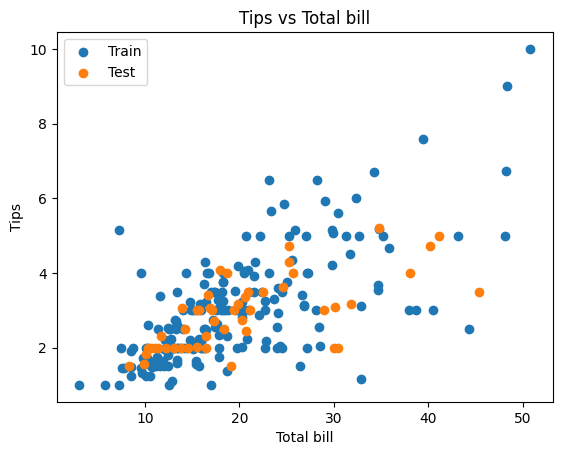

In [3]:
# It's natural to plot scatter plot between predictor and target. 
plt.scatter(X_train_tips.loc[:, ['total_bill']], y_train_tips, label = "Train")
plt.scatter(X_test_tips.loc[:, ['total_bill']], y_test_tips, label = "Test")
plt.title("Tips vs Total bill")
plt.xlabel("Total bill")
plt.ylabel("Tips")
plt.legend()
fig = plt.show()

**To undersatnd any `codes`, you can use `help`: `help(codes)`.**

**Example:** `help(LinearRegression)`

In [4]:
# Loading linear regression is simple called "reg0"
reg0 = LinearRegression()

# Fit a linear line on the training data using `fit` method:
reg0.fit(X_train_tips.loc[:,['total_bill']], y_train_tips)

# The estimated coefficients
(reg0.intercept_, reg0.coef_)

(array([0.79444624]), array([[0.11358781]]))

In [5]:
# Making prediction on testing data using variable 'total_bill':
pred0 = reg0.predict(X_test_tips.loc[:,['total_bill']])

# Measure error using RMSE compared to "y_test_tips"
np.sqrt(mean_squared_error(y_test_tips, pred0))

0.8145329144810914

### 1.2 Regularized linear regression
#### 1.2.1 Ridge regresssion

$$(a^*,b^*,\alpha^*)=\arg\min_{(a,b,\alpha)}\sum_{i=1}^n(y_i-(ax_i+b))^2+\alpha(a^2+b^2)$$

- `GridSearchCV` performs grid search algorithm over a list of parameters you want to tune, using K-fold cross-validation.

In [6]:
# Cross-validation with GridSearchCV is used to search for penalty parameter `alpha` (`lambda` in the talk)
grid = {
    "alpha" : 2 ** np.linspace(-10,20,num=100) # regularization strength
}

ridge_cv = GridSearchCV(estimator= Ridge(), 
                        param_grid=grid, cv=5)

ridge_cv.fit(X_train_tips.loc[:,['total_bill']], y_train_tips)

print('Best parameter:', ridge_cv.best_params_['alpha'])

Best parameter: 1922.9305050351759


In [7]:
# Train Ridge model with the optimal panelty parameter obtained above

ridge0 = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_tips.loc[:,['total_bill']], y_train_tips)
print("Coefficients:", (ridge0.intercept_, ridge0.coef_))

# predict 
pred_ridge0 = ridge0.predict(X_test_tips.loc[:,['total_bill']])

# Measure error using RMSE
np.sqrt(mean_squared_error(y_test_tips, pred_ridge0))

Coefficients: (array([1.04129933]), array([[0.1009982]]))


0.7682224735315277

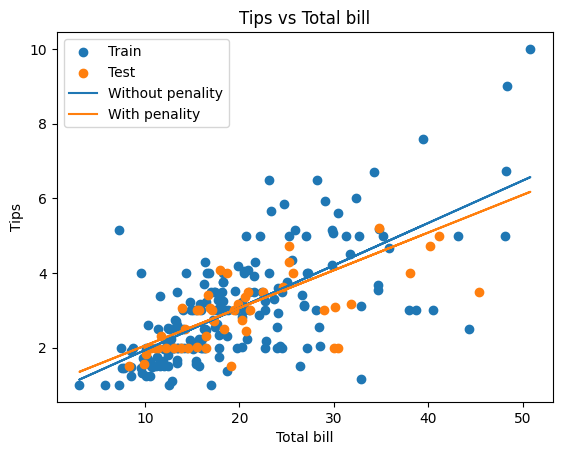

In [8]:
# Let's see how the two lines differ
 
# It's natural to plot scatter plot between predictor and target. 
plt.scatter(X_train_tips.loc[:, ['total_bill']], y_train_tips, label = "Train")
plt.scatter(X_test_tips.loc[:, ['total_bill']], y_test_tips, label = "Test")
plt.plot(X_train_tips.loc[:, ['total_bill']], reg0.predict(X_train_tips.loc[:, ['total_bill']]), label = "Without penality")
plt.plot(X_train_tips.loc[:, ['total_bill']], ridge0.predict(X_train_tips.loc[:, ['total_bill']]), label = "With penality")
plt.title("Tips vs Total bill")
plt.xlabel("Total bill")
plt.ylabel("Tips")
plt.legend()
plt.show()

### 1.2.2 Lasso

If you are not too lazy, do the same thing for `Lasso` regression ($\ell_1$ penalty)

$$(a^*,b^*,\alpha^*)=\arg\min_{(a,b,\alpha)}\sum_{i=1}^n(y_i-(ax_i+b))^2+\alpha(|a|+|b|).$$

**Don't hesitate to add more cells as you are working on it!**

In [ ]:
# To do


## 1.3 Multiple Linear Regression

You can do pretty much the same as what we have done by including `size` variable in the training and testing data.

In [9]:
# Direct MLR
reg1 = LinearRegression().fit(X_train_tips.loc[:,['total_bill', 'size']], y_train_tips)

pred_mlr = reg1.predict(X_test_tips.loc[:,['total_bill', 'size']])

np.sqrt(mean_squared_error(y_test_tips, pred_mlr))

0.8210834735838907

In [ ]:
# Check what regularization parameters are called in Elastic net?
# help(ElasticNet)

# Let do elastic net in this case
param = {
    'alpha' : 10 ** np.linspace(-5,3, num=50),
    'l1_ratio' : np.linspace(0,1, num=20)
}

elas_cv = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param,
    cv=10
)

elas_cv.fit(X_train_tips.loc[:,['total_bill', 'size']], y_train_tips)

<div class="alert alert-block alert-danger">
<b>Q0. A.</b> What are the warnings about? When <code>l1_ratio</code> is null, what does it mean? What type of regularized model should you consider? Let's build the final model.
</div>

*Your answer:*

In [11]:
print("Best parameters:", elas_cv.best_params_)

mlr_elas = ElasticNet(alpha=elas_cv.best_params_['alpha'],
                      l1_ratio=elas_cv.best_params_['l1_ratio']).fit(X_train_tips.loc[:,['total_bill', 'size']], y_train_tips)

pred_mlr_elas = mlr_elas.predict(X_test_tips.loc[:,['total_bill', 'size']])

np.sqrt(mean_squared_error(y_test_tips, pred_mlr_elas))

Best parameters: {'alpha': 10.985411419875572, 'l1_ratio': 0.0}


C:\Users\Sothea Has\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+02, tolerance: 4.212e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.7640642937177642

<div class="alert alert-block alert-danger">
<b>Q0. B.</b> Is this better than simple linear regression?
</div>

*Your answer:*

## 2. Logistic Regression
### 2.1 Perceptron (Binary Logistic Regression) with `Spam` dataset
$$\mathbb{P}(Y=1|X=x)=\sigma(x^t\beta),\text{ where }\sigma(t)=\frac{1}{1+e^{-t}}$$

You have seen how it all works in linear regression case. Everything is similar, just replace `LinearRegression` or `Ridge` in the previous case by `LogisticRegression`. Remember to follow this steps: `load model`, `fit`, `predict`, and then `evaluation` using suitable metrics.

In [ ]:
# Feel free to look at the distributions of predictors and target of the dataset

# TO DO

Just build a logistic regression model on the training data using.

In [13]:
logit0 = LogisticRegression().fit(X_train_spam, y_train_spam)
logit0.coef_

C:\Users\Sothea Has\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-2.58653847e-01, -5.25702603e-02,  1.66977608e-01,
         2.82685135e-01,  6.23944607e-01,  7.41330076e-01,
         1.65942603e+00,  1.07871059e+00,  4.92254730e-01,
        -1.78877800e-01,  3.54135491e-02, -1.18973091e-01,
         1.90574262e-01,  1.95521845e-01,  3.86512970e-01,
         1.24815974e+00,  8.83756481e-01,  4.91825445e-01,
         8.00678704e-02,  6.58421425e-01,  1.94212922e-01,
         2.28210012e-01,  1.45357947e+00,  6.28833484e-01,
        -2.28892148e+00, -1.17780804e+00, -3.33314749e+00,
         3.20247292e-01, -6.48856511e-01, -3.84272665e-01,
        -3.39579478e-01, -1.97513943e-01, -8.41296667e-01,
        -2.05173285e-01, -5.55330389e-01,  8.86075536e-02,
        -3.32435205e-01, -3.42832885e-01, -5.62647775e-01,
        -2.43218930e-01, -5.09819740e-01, -1.20249379e+00,
        -2.97950447e-01, -8.18513390e-01, -7.82352585e-01,
        -1.44079523e+00, -1.61224355e-01, -5.03618399e-01,
        -7.24652498e-01, -1.78907413e-01, -1.21502270e-0

<div class="alert alert-block alert-danger">
<b>Q1.</b> What is the warning about? What convergence does it refer to?
</div>

*Your answer:*

<div class="alert alert-block alert-danger">
<b>Q2.</b> Let's fix the warning by increasing the <code>max_iter</code> option in <code>LogisticRegression</code> object, then fit it on the training data. Finally, evaluate how well does the model perform on the testing data?
</div>

In [ ]:
# TO DO

In [ ]:
# TO DO

### 2.2 Regularized Logistic Regression

<div class="alert alert-block alert-danger">
<b>Q3. A.</b> You should read <code>help(LogisticRegression)</code> or look it up. The goal is to realize that the penalty parameter are already built in <code>LogisticRegression</code> object.<br> 
    <li> Now, what are the arguments to control the regularization parameter in <code>LogisticRegression</code>? </li>
    <li> Find the best ones using <code>GridSearchCV</code> as we did in the previous section. </li>
</div>

In [ ]:
# TO DO

In [ ]:
# TO DO

<div class="alert alert-block alert-danger"> 
<b>Q3. B.</b> Make prediction on the test data and compute its performance.
</div>

In [ ]:
# TO DO

### 2.3 Multinomial Logistic Regression or Multi-layer Perceptron (MLP)

If you reach this question, you have done well. I'm sure you know what to do with `Mnist` dataset. I'll process the data for you a bit, then you will build your own model using what you done up until now. Let's first look at some training examples.

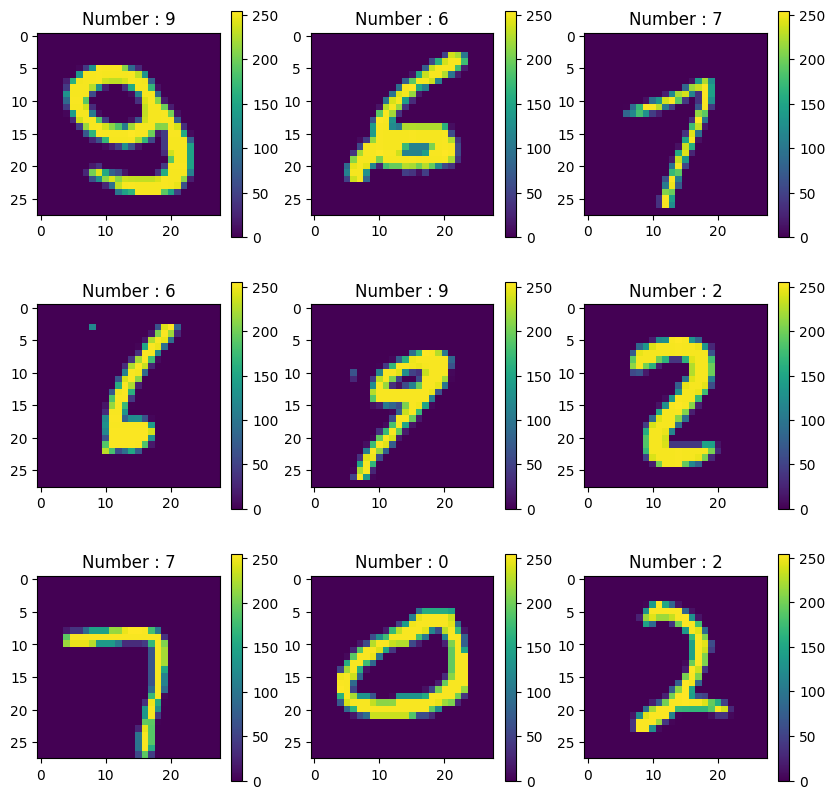

In [14]:
f, axs = plt.subplots(3,3,figsize=(10,10))
ind = np.random.choice(range(len(y_train_mnist)), 9)
for i in range(9):
    k = ind[i]
    j = i%3
    jj = int(np.floor(i/3))
    im = axs[jj,j].imshow(X_train_mnist[k, :, :])
    plt.colorbar(im, ax=axs[jj, j])
    axs[jj,j].set_title("Number : "+str(y_train_mnist[k]))


In [15]:
# Convert labels 0-9 to one-hot vector. Let create new target called 'y_train_mnist1' and 'y_test_mnist1' resp.
y_train_mnist1 = to_categorical(y_train_mnist) 
y_test_mnist1 = to_categorical(y_test_mnist)
num_labels = len(np.unique(y_train_mnist))

# Dimension of images
image_size_mnist = X_train_mnist.shape[1]
input_size_mnist = image_size_mnist** 2

# resize and normalize
X_train_mnist1 = np.reshape(X_train_mnist, [-1, input_size_mnist])
X_train_mnist1 = X_train_mnist1.astype('float32') / 255
X_test_mnist1 = np.reshape(X_test_mnist, [-1, input_size_mnist])
X_test_mnist1 = X_test_mnist1.astype('float32') / 255

<div class="alert alert-block alert-danger"> 
<b>Q4.</b> Now, you can build MLP using <code>X_train_mnist1</code> and <code>y_train_mnist1</code> and <code>LogisticRegression</code> object. Don't forget to test it using the testing data <code>X_test_mnist1</code>.
</div>

In [ ]:
# TO DO

In [ ]:
# TO DO

## 3. Deep Neural Networks

<div class="alert alert-block alert-success">
It is your entire choice to design your networks now. Try to compare DNN result with the previous methods on <code>Spam</code> and <code>Mnist</code> dataset.
</div>

To train neural networks, we need the following methods:
    <li> `Sequential`: `keras` model allowing us to build a sequent of layers in the networks.</li>
    <li> `Dense`, `Dropout`: `keras` layer module allowing us to design the size and property of different types of layers in the NN.</li>
    <li> `to_categorical` : to perform `one-hot` encoding on categorical target (must be in `int` type).</li>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2

# This function allows you to keep track of the learning curves
def plot_history(fitted_model, key, save = False, showfig = False, img_path = None):
    plt.plot(fitted_model.history[key])
    plt.plot(fitted_model.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    if save:
        image_name = 'training_curve.png'
        if img_path is None:
            plt.savefig(image_name, format='png', dpi=600, bbox_inches='tight')
        else:
            plt.savefig(img_path + image_name, dpi=600, bbox_inches='tight')
        plt.clf()
    if showfig:
        plt.show()

### 3.1 `Spam` data with DNN

We first encode the target from categorical to binary vector: `spam` = (0,1) and `nonspam` = (1,0). This can be done using `to_categorical` function.

In [17]:
# One hot encoding
temp = np.repeat(1, len(y_train_spam))
temp[y_train_spam == "nonspam"] = 0
y_train_spam1 = to_categorical(temp)

temp = np.repeat(1, len(y_test_spam))
temp[y_test_spam == "nonspam"] = 0
y_test_spam1 = to_categorical(temp)

<div class="alert alert-block alert-success">
The most complicated part of building DNN is to choose its architecture and its hyperparameters. The followings are chosen based on a few tries. In practice, you can start with small networks, then progressively increase the size of the networks according to the training process.
</div>

In [18]:
# network parameters
input_size_spam = X_train_spam.shape[1]
n_epochs_spam = 200                       # The number of network-complete-update iterations in the training process.
batch_size_spam = 200
hidden_units_spam = 16
learn_rate = 0.001
val_size_spam = 0.05                      # The size of validation data to keep track of model performance at each epoch

# Building the sequent of the NN
model = Sequential()
model.add(Dense(hidden_units_spam, input_dim=input_size_spam, activation='relu', bias_regularizer = l2(100)))
model.add(Dense(2, activation='sigmoid'))

# Set up compiling method of the model 
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = Adam(learning_rate = learn_rate),
  metrics =['accuracy'])

In [19]:
# Fitting the model
history = model.fit(
  X_train_spam,
  y_train_spam1,
  epochs = n_epochs_spam,
  batch_size = batch_size_spam,
  validation_split = val_size_spam
)

Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 3.4207 - accuracy: 0.5169 - val_loss: 2.3338 - val_accuracy: 0.4402
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 1.2624 - accuracy: 0.5807 - val_loss: 1.1797 - val_accuracy: 0.6522
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.8069 - accuracy: 0.6453 - val_loss: 0.9004 - val_accuracy: 0.6848
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.7140 - val_loss: 0.6193 - val_accuracy: 0.7500
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.7772 - val_loss: 0.6022 - val_accuracy: 0.7880
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.8055 - val_loss: 0.5436 - val_accuracy: 0.7772
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5415 - accuracy: 0.7812 - val_loss: 0.5963 - val_accuracy: 0.7826
Epoch 8/200


<div class="alert alert-block alert-success">
This is the most important part where you can access the state of your model. In general, as the network has just been trained, the accuracy on both training and validation data should be low and progressively increasing. After awhile, the accuracy on the training data should keep increasing while the accuracy on the validation set might drop when the network is trained long enough and starts to overfit the training data. One should stop the training process before the accuracy on the validation set drops too much (too overfitting). <code>Early stopping</code> is a method allowing to end the training process when the validation accuracy starts to decrease. However, we don't discuss it here because the training process is not so complicated. This graph can also provide many insignts related to the state of the model, yielding the adjustment of the model's architecture and hyperparameter tuning. For more information,see for example, <a href="https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html" class="blank">https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html</a>.
</div>

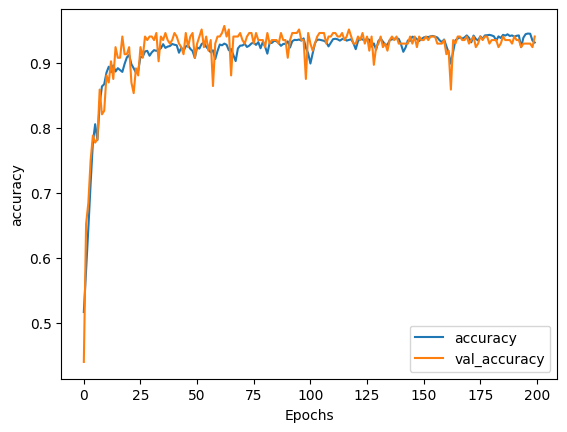

In [20]:
# Plot the history
plot_history(history, 'accuracy', showfig=True)

In [21]:
# Measure the performance of the model
loss, acc = model.evaluate(X_test_spam, y_test_spam1, verbose=0)

print("loss = {} , accuracy = {}".format(loss, acc))

loss = 0.16145944595336914 , accuracy = 0.9478827118873596


<div class="alert alert-block alert-danger"> 
<b>Q5.</b> Play with different values of hyperparameters including <code>learning_rate, hidden_units, batch_size</code> and <code>n_epoch</code>. Notice the change in learning curves according to each option of these hyperparameters.
</div>

### 3.2 `Mnist` data with DNN

Use what you have learned to build your own DNN classifier. Good luck!

In [ ]:
# TO DO

In [ ]:
# TO DO